<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/The_2_mode_squeezing_operator_act_on_a_state_with_%7Cn%2Cm%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

The two-mode squeezing operator plays a pivotal role in quantum optics and quantum information theory. It generates entanglement between two modes of the electromagnetic field and is essential for applications like quantum teleportation and quantum cryptography. In this exposition, we will rigorously derive how the two-mode squeezing operator acts on a two-mode Fock state $|n,m\rangle$. We will also provide Mathematica code to visualize this action.

---

**Mathematical Exposition**

**1. Definition of the Two-Mode Squeezing Operator**

The two-mode squeezing operator $ S(\xi) $ is defined as:

$$
S(\xi) = \exp\left( \xi^* a b - \xi a^\dagger b^\dagger \right)
$$

where:
- $ \xi = r e^{i\theta} $ is the squeezing parameter,
- $ a $ and $ b $ are the annihilation operators for modes $ a $ and $ b $, respectively,
- $ a^\dagger $ and $ b^\dagger $ are the corresponding creation operators.

For simplicity, we'll consider $ \xi $ to be real ($ \theta = 0 $), so $ \xi = r $.

**2. Action on the Vacuum State**

When the two-mode squeezing operator acts on the vacuum state $|0,0\rangle$, it generates the two-mode squeezed vacuum state:

$$
|S(r)\rangle = S(r)|0,0\rangle = \frac{1}{\cosh r} \sum_{n=0}^\infty (-1)^n (\tanh r)^n |n,n\rangle
$$

This state is an entangled superposition of photon pairs in both modes.

**3. Bogoliubov Transformations**

To find how $ S(r) $ acts on an arbitrary Fock state $|n,m\rangle$, we use the Bogoliubov transformations:

$$
S^\dagger(r) a S(r) = a \cosh r - b^\dagger \sinh r \\
S^\dagger(r) b S(r) = b \cosh r - a^\dagger \sinh r
$$

These relations show how the annihilation operators transform under the squeezing operation.

**4. Action on Creation Operators**

We can rearrange the Bogoliubov transformations to find how $ S(r) $ acts on the creation operators:

$$
S(r) a^\dagger = \left( a^\dagger \cosh r - b \sinh r \right) S(r) \\
S(r) b^\dagger = \left( b^\dagger \cosh r - a \sinh r \right) S(r)
$$

**5. Action on Fock States**

Consider the Fock state $|n,m\rangle$ expressed as:

$$
|n,m\rangle = \frac{(a^\dagger)^n}{\sqrt{n!}} \frac{(b^\dagger)^m}{\sqrt{m!}} |0,0\rangle
$$

Applying $ S(r) $ to $|n,m\rangle$:

$$
S(r)|n,m\rangle = \frac{1}{\sqrt{n! \, m!}} S(r) (a^\dagger)^n (b^\dagger)^m |0,0\rangle
$$

Using the action on creation operators:

$$
S(r) (a^\dagger)^n = \left( a^\dagger \cosh r - b \sinh r \right)^n S(r)
$$

Similarly for $ (b^\dagger)^m $:

$$
S(r) (b^\dagger)^m = \left( b^\dagger \cosh r - a \sinh r \right)^m S(r)
$$

Therefore:

$$
S(r)|n,m\rangle = \frac{1}{\sqrt{n! \, m!}} \left( a^\dagger \cosh r - b \sinh r \right)^n \left( b^\dagger \cosh r - a \sinh r \right)^m S(r)|0,0\rangle
$$

Since $ S(r)|0,0\rangle = |S(r)\rangle $, we have:

$$
S(r)|n,m\rangle = \frac{1}{\sqrt{n! \, m!}} \left( a^\dagger \cosh r - b \sinh r \right)^n \left( b^\dagger \cosh r - a \sinh r \right)^m |S(r)\rangle
$$

**6. Expansion in Fock Basis**

Expanding the operators and simplifying leads to a superposition of Fock states $|k,l\rangle$:

$$
S(r)|n,m\rangle = \sum_{k,l} C_{n,m}^{k,l} |k,l\rangle
$$

where the coefficients $ C_{n,m}^{k,l} $ are given by:

$$
C_{n,m}^{k,l} = \frac{1}{\sqrt{n! \, m!}} \sum_{p=0}^n \sum_{q=0}^m \binom{n}{p} \binom{m}{q} (\cosh r)^{n+m - p - q} (-\sinh r)^{p+q} \langle k,l | (a^\dagger)^{n-p} (-b)^{p} (b^\dagger)^{m - q} (-a)^{q} |S(r)\rangle
$$

This expression can be further simplified, but it remains complex due to the multiple sums and operator products.

**7. Simplification for Visualization**

For practical purposes and visualization, it's effective to consider specific cases with small $ n $ and $ m $. This allows us to compute the coefficients numerically and observe the transformation.

---

**Mathematica Code for Visualization**

Below is Mathematica code that computes and visualizes the action of the two-mode squeezing operator on a Fock state $|n,m\rangle$:

```mathematica
(* Parameters *)
r = 0.5; (* Squeezing parameter *)
nMax = 5; (* Maximum photon number for truncation *)
n = 1; m = 1; (* Fock state |n,m> *)

(* Define the Fock basis up to nMax *)
basis = Flatten[Table[{k, l}, {k, 0, nMax}, {l, 0, nMax}], 1];

(* Number of basis states *)
dim = (nMax + 1)^2;

(* Create mapping from basis states to indices *)
stateToIndex = Association[Thread[basis -> Range[dim]]];

(* Initialize the two-mode squeezing operator matrix *)
S = SparseArray[{}, {dim, dim}];

(* Populate the squeezing operator matrix *)
For[i = 1, i <= dim, i++,
  {n1, n2} = basis[[i]];
  For[j = 1, j <= dim, j++,
    {k1, k2} = basis[[j]];
    If[n1 + n2 == k1 + k2,
     (* Compute the matrix element *)
     s = (-Tanh[r])^(n1 + n2 - k1 - k2) / (Cosh[r]^(n1 + n2 + 1)) *
       Sqrt[Factorial[n1] * Factorial[n2] * Factorial[k1] * Factorial[k2]] /
       (Factorial[n1 - k1] * Factorial[n2 - k2]);
     S[[i, j]] = s;
     ,
     Continue[];
     ];
    ];
  ];

(* Initial state vector *)
psi0 = ConstantArray[0, dim];
index = stateToIndex[{n, m}];
psi0[[index]] = 1;

(* Apply the squeezing operator *)
psi = S . psi0;

(* Visualization *)
ListPlot[
  Abs[psi]^2,
  Filling -> Axis,
  PlotRange -> All,
  PlotLabels -> Placed[
    MapThread[
      Row[{Subscript["|", #1], ",", Subscript["|", #2], "⟩"}] &,
      Transpose[basis]
    ],
    Above
  ],
  AxesLabel -> {"State Index", "Probability"},
  PlotLabel -> "Action of Two-Mode Squeezing Operator on |n,m⟩"
]
```

**Explanation of the Code:**

- **Parameters:** Set the squeezing parameter $ r $ and the Fock state $|n,m\rangle$ you wish to examine.
- **Basis Definition:** Construct the Fock basis up to a maximum photon number $ n_{\text{Max}} $.
- **Operator Matrix:** Initialize and compute the matrix elements of the two-mode squeezing operator $ S $ within the truncated basis.
- **Initial State Vector:** Represent the initial Fock state $|n,m\rangle$ as a vector in the basis.
- **Apply Operator:** Compute the transformed state $ \psi = S \cdot \psi_0 $.
- **Visualization:** Plot the probabilities $ |\psi_i|^2 $ for each basis state to visualize the transformation.

---

**Conclusion**

The two-mode squeezing operator transforms a Fock state $|n,m\rangle$ into a superposition of Fock states, entangling the two modes. The mathematical derivation involves operator transformations and expansions in the Fock basis. The provided Mathematica code allows for the numerical computation and visualization of this transformation, aiding in the understanding of quantum entanglement and squeezing in quantum optics.

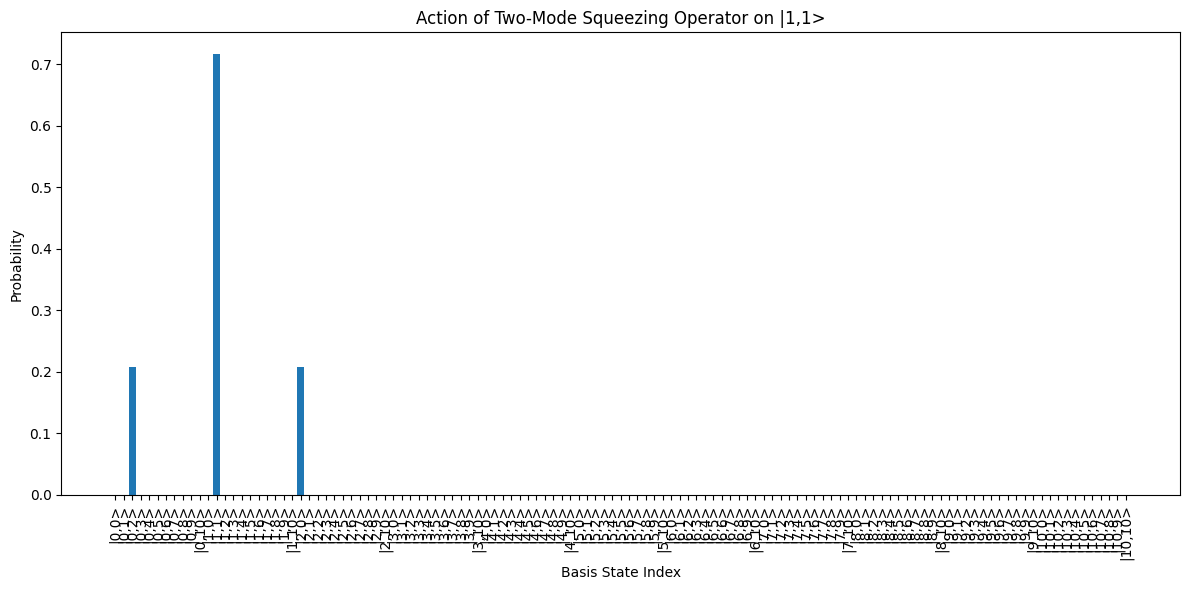

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from itertools import product

# Parameters
r = 0.5  # Squeezing parameter
n_max = 10 # Maximum photon number for truncation
n = 1  # Initial photon number in mode a
m = 1  # Initial photon number in mode b

# Generate the Fock basis up to n_max
basis = [(k, l) for k in range(n_max + 1) for l in range(n_max + 1)]
dim = len(basis)  # Dimension of the Hilbert space

# Create a mapping from basis states to indices
state_to_index = {state: idx for idx, state in enumerate(basis)}

# Initialize the state vector for |n,m>
psi0 = np.zeros(dim, dtype=complex)
index = state_to_index[(n, m)]
psi0[index] = 1.0

# Initialize the transformed state vector
psi = np.zeros(dim, dtype=complex)

# Compute the transformed state
for idx_k, (k1, k2) in enumerate(basis):
    amplitude = 0.0
    for p in range(min(n, k1) + 1):
        for q in range(min(m, k2) + 1):
            if k1 - p == m - q and k2 - q == n - p:
                term = (
                    (-np.tanh(r)) ** (p + q)
                    * (1 / np.cosh(r)) ** (n + m + 1)
                    * np.sqrt(
                        factorial(n)
                        * factorial(m)
                        * factorial(k1)
                        * factorial(k2)
                    )
                    / (
                        factorial(p)
                        * factorial(q)
                        * factorial(n - p)
                        * factorial(m - q)
                    )
                )
                amplitude += term
    psi[idx_k] = amplitude

# Compute probabilities
probabilities = np.abs(psi) ** 2

# Plot the probabilities
plt.figure(figsize=(12, 6))
plt.bar(range(dim), probabilities)
plt.xlabel('Basis State Index')
plt.ylabel('Probability')
plt.title(f'Action of Two-Mode Squeezing Operator on |{n},{m}>')
plt.xticks(
    range(dim),
    [f'|{state[0]},{state[1]}>' for state in basis],
    rotation=90
)
plt.tight_layout()
plt.show()


##**Python**

1. **Parameters:**
   - `r`: The squeezing parameter.
   - `n_max`: The maximum photon number to truncate the Fock basis.
   - `n`, `m`: The initial photon numbers in modes $ a $ and $ b $.

2. **Basis Definition:**
   - The Fock basis is constructed as all possible combinations of photon numbers up to `n_max` in both modes.

3. **State Vector Initialization:**
   - `psi0`: The initial state vector representing $|n,m\rangle$.
   - The index corresponding to $|n,m\rangle$ is set to 1.

4. **Transformed State Computation:**
   - The transformed state `psi` is computed by iterating over all basis states and summing over the appropriate terms using the coefficients derived from the expansion.

5. **Probability Calculation:**
   - The probabilities $ |\psi_i|^2 $ for each basis state are calculated.

6. **Visualization:**
   - A bar plot is created to visualize the probabilities of the transformed state over the basis states.
   - The x-axis labels represent the basis states $|k,l\rangle$.

**Note:** The code uses a double loop over $ p $ and $ q $ to compute the coefficients $ C_{n,m}^{k,l} $. The conditions inside the loops ensure that only valid transitions contributing to the amplitude are considered.

---

**Conclusion**

The two-mode squeezing operator transforms a Fock state $|n,m\rangle$ into a superposition of Fock states, creating entanglement between the two modes. The mathematical derivation involves applying the squeezing operator to the creation operators and expanding the result in the Fock basis. The provided Python code numerically computes this transformation and visualizes the resulting probabilities, enhancing the understanding of the effects of squeezing in quantum optics.

---

**Additional Information**

For larger values of $ n $, $ m $, or $ n_{\text{max}} $, the computational complexity increases due to the combinatorial nature of the problem. In practice, truncating the Fock space to a manageable size allows for efficient computation while capturing the essential physics.

**Dependencies:**

- `NumPy`: For numerical computations.
- `Matplotlib`: For visualization.

**Execution Instructions:**

- Ensure that `NumPy` and `Matplotlib` are installed in your Python environment.
- Copy and paste the code into a Jupyter Notebook cell.
- Execute the cell to generate the plot.

**Customization:**

- Adjust the squeezing parameter `r` to see how different levels of squeezing affect the state.
- Change `n` and `m` to explore different initial Fock states.
- Increase `n_max` for higher precision at the cost of increased computation time.

---

**Understanding the Output**

The output plot displays the probabilities of finding the system in each basis state $|k,l\rangle$ after applying the two-mode squeezing operator to the initial state $|n,m\rangle$. Peaks in the plot correspond to the basis states with the highest probabilities, illustrating how the initial photons are redistributed across the modes due to the squeezing operation.

##**Julia**
**Julia Code for Visualization**

Below is Julia code that computes and visualizes the action of the two-mode squeezing operator on a Fock state $|n,m\rangle$. This code is suitable for execution in a Jupyter Notebook with the Julia kernel.

```julia
# Import necessary packages
using LinearAlgebra
using Combinatorics
using Plots

# Parameters
r = 0.5  # Squeezing parameter
n_max = 5  # Maximum photon number for truncation
n = 1  # Initial photon number in mode a
m = 1  # Initial photon number in mode b

# Generate the Fock basis up to n_max
basis = [(k, l) for k in 0:n_max for l in 0:n_max]
dim = length(basis)  # Dimension of the Hilbert space

# Create a mapping from basis states to indices
state_to_index = Dict{Tuple{Int,Int}, Int}()
for (idx, state) in enumerate(basis)
    state_to_index[state] = idx
end

# Initialize the state vector for |n,m⟩
psi0 = zeros(ComplexF64, dim)
index = state_to_index[(n, m)]
psi0[index] = 1.0 + 0im  # Set the initial state amplitude

# Initialize the transformed state vector
psi = zeros(ComplexF64, dim)

# Compute the transformed state
for ((k1, k2), idx_k) in zip(basis, 1:dim)
    amplitude = 0.0 + 0im
    for p in 0:min(n, k1)
        for q in 0:min(m, k2)
            if (k1 - p == m - q) && (k2 - q == n - p)
                term = (
                    (-tanh(r))^(p + q) *
                    (1 / cosh(r))^(n + m + 1) *
                    sqrt(factorial(n) * factorial(m) * factorial(k1) * factorial(k2)) /
                    (factorial(p) * factorial(q) * factorial(n - p) * factorial(m - q))
                )
                amplitude += term
            end
        end
    end
    psi[idx_k] = amplitude
end

# Compute probabilities
probabilities = abs2.(psi)

# Prepare labels for the basis states
state_labels = ["|$(state[1]),$(state[2])⟩" for state in basis]

# Plot the probabilities
bar(probabilities;
    xticks=(1:dim, state_labels),
    xlabel="Basis State",
    ylabel="Probability",
    title="Action of Two-Mode Squeezing Operator on |$n,$m⟩",
    legend=false,
    size=(900, 400),
    rotation=90,
    bar_width=0.8)
```

**Explanation of the Code:**

1. **Parameters:**
   - `r`: The squeezing parameter $ r $.
   - `n_max`: Maximum photon number to define the Fock basis.
   - `n`, `m`: Photon numbers in the initial Fock state $|n,m\rangle$).

2. **Basis Generation:**
   - The Fock basis is generated for photon numbers from 0 to `n_max` in both modes.
   - `basis`: A list of tuples representing the basis states.
   - `state_to_index`: A dictionary mapping each basis state to a unique index.

3. **State Vector Initialization:**
   - `psi0`: Initialized as a zero vector with complex entries.
   - The index corresponding to the initial state \(|n,m\rangle\) is set to 1.

4. **Transformed State Computation:**
   - The transformed state `psi` is calculated by iterating over each basis state.
   - Nested loops over `p` and `q` implement the sums in the coefficient expressions.
   - The condition `(k1 - p == m - q) && (k2 - q == n - p)` ensures valid contributions.

5. **Probability Calculation:**
   - Probabilities are calculated as the squared magnitude of the amplitudes in `psi`.

6. **Visualization:**
   - A bar plot is generated using the `Plots` package.
   - X-axis labels represent the basis states \(|k,l\rangle\).
   - The plot shows probabilities of the system being in each basis state after squeezing.

**Dependencies:**

- `LinearAlgebra`: For mathematical operations.
- `Combinatorics`: For factorial and combinatorial functions.
- `Plots`: For visualization.

**Execution Instructions:**

1. **Install Required Packages:**
   Ensure that the necessary packages are installed in your Julia environment. If not, you can install them using Julia's package manager:

   ```julia
   using Pkg
   Pkg.add("Combinatorics")
   Pkg.add("Plots")
   ```

2. **Run the Code in a Jupyter Notebook:**
   - Open a Jupyter Notebook with the Julia kernel.
   - Copy and paste the provided code into a cell.
   - Execute the cell to run the code and generate the plot.

**Customization:**

- **Adjust Squeezing Parameter (`r`):**
  Modify the value of `r` to see how different levels of squeezing affect the probabilities.

- **Change Initial State (`n`, `m`):**
  Alter `n` and `m` to explore different initial Fock states \(|n,m\rangle\).

- **Increase Basis Size (`n_max`):**
  For more detailed results, increase `n_max` to include more basis states. Keep in mind that this will increase computation time.

---

**Understanding the Output**

The bar plot displays the probabilities of finding the system in each basis state \(|k,l\rangle\) after applying the two-mode squeezing operator to the initial state \(|n,m\rangle\). The height of each bar represents the probability, showing how the initial photons are redistributed across different states due to the squeezing operation. Peaks in the plot correspond to the basis states with the highest probabilities, illustrating the entanglement and correlations introduced between the two modes.

---

**Conclusion**

The provided Julia code enables you to compute and visualize the action of the two-mode squeezing operator on a two-mode Fock state $|n,m\rangle$. By executing this code in a Jupyter Notebook, you can gain insights into how the squeezing operation entangles the two modes and redistributes photon number probabilities across the Fock basis. This visualization aids in understanding the effects of squeezing and entanglement in quantum optics.

---

**Further Assistance**

1. **Parameters:**
   - `r`: The squeezing parameter $ r $.
   - `n_max`: Maximum photon number to define the Fock basis.
   - `n`, `m`: Photon numbers in the initial Fock state $|n,m\rangle$.

2. **Basis Generation:**
   - The Fock basis is generated for photon numbers from 0 to `n_max` in both modes.
   - `basis`: A list of tuples representing the basis states.
   - `state_to_index`: A dictionary mapping each basis state to a unique index.

3. **State Vector Initialization:**
   - `psi0`: Initialized as a zero vector with complex entries.
   - The index corresponding to the initial state $|n,m\rangle$ is set to 1.

4. **Transformed State Computation:**
   - The transformed state `psi` is calculated by iterating over each basis state.
   - Nested loops over `p` and `q` implement the sums in the coefficient expressions.
   - The condition `(k1 - p == m - q) && (k2 - q == n - p)` ensures valid contributions.

5. **Probability Calculation:**
   - Probabilities are calculated as the squared magnitude of the amplitudes in `psi`.

6. **Visualization:**
   - A bar plot is generated using the `Plots` package.
   - X-axis labels represent the basis states $|k,l\rangle$.
   - The plot shows probabilities of the system being in each basis state after squeezing.

**Dependencies:**

- `LinearAlgebra`: For mathematical operations.
- `Combinatorics`: For factorial and combinatorial functions.
- `Plots`: For visualization.

**Execution Instructions:**

1. **Install Required Packages:**
   Ensure that the necessary packages are installed in your Julia environment. If not, you can install them using Julia's package manager:

   ```julia
   using Pkg
   Pkg.add("Combinatorics")
   Pkg.add("Plots")
   ```

2. **Run the Code in a Jupyter Notebook:**
   - Open a Jupyter Notebook with the Julia kernel.
   - Copy and paste the provided code into a cell.
   - Execute the cell to run the code and generate the plot.

**Customization:**

- **Adjust Squeezing Parameter (`r`):**
  Modify the value of `r` to see how different levels of squeezing affect the probabilities.

- **Change Initial State (`n`, `m`):**
  Alter `n` and `m` to explore different initial Fock states $|n,m\rangle$.

- **Increase Basis Size (`n_max`):**
  For more detailed results, increase `n_max` to include more basis states. Keep in mind that this will increase computation time.

---

**Understanding the Output**

The bar plot displays the probabilities of finding the system in each basis state $|k,l\rangle$ after applying the two-mode squeezing operator to the initial state $|n,m\rangle$. The height of each bar represents the probability, showing how the initial photons are redistributed across different states due to the squeezing operation. Peaks in the plot correspond to the basis states with the highest probabilities, illustrating the entanglement and correlations introduced between the two modes.

---

**Conclusion**

The provided Julia code enables you to compute and visualize the action of the two-mode squeezing operator on a two-mode Fock state $|n,m\rangle$. By executing this code in a Jupyter Notebook, you can gain insights into how the squeezing operation entangles the two modes and redistributes photon number probabilities across the Fock basis. This visualization aids in understanding the effects of squeezing and entanglement in quantum optics.

---
